# Installing and Importing Dependencies

In [117]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [172]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

In [11]:
# smaller size plots
plt.rcParams.update({
    'font.size': 7,
    'figure.figsize': (4.3, 2.8),
    'lines.linewidth': 1,
})

# 0. Understanding Data

## Diamond Cut
Because it is composed of a generally transparent material, diamond lets light pass through it, even in its most rough condition. But early on in history, stone cutters realized that you can get extra sparkle if you facet the diamond, and they set about finding out the best combination of facet size and shape and angle to get the most sparkle. Eventually, one design with 58 facets was shown to be the most efficient way to maximize the stone's best qualities and this became known as the ideal cut. It remains the industry standard, and is the shape that most people recognize as being a diamond shape.[Read more..](https://www.torresjewelco.com.au/diamonds/education/diamond-cut.html)

![Diamond Cut](https://www.torresjewelco.com.au/skin/frontend/default/default/images/edu_cut-1.png)

## Diamond Color
Color in diamonds comes from chemical impurities in the stone and imperfections in its molecular structure. The variety of impurities that can be found is large enough to give the stone a potential array of colors, the predominant ones being yellow and brown.[Read more..](https://www.torresjewelco.com.au/diamonds/education/diamond-color.html)

![Diamond Color](https://www.torresjewelco.com.au/media/wysiwyg/edu_color-1.png)

## Diamond Clarity
Clarity, as the name implies, refers to how clear the material is that the stone is made of, and what surface imperfections it may have. These have a direct effect on how light passes into a diamond and bounces around within it before finally exiting.
[Read more...](https://www.torresjewelco.com.au/diamonds/education/diamond-clarity.html)

![Diamond Clarity](https://www.torresjewelco.com.au/media/wysiwyg/edu_clarity-1.png)

## Diamond Carat Weight
The size of the diamond is called its carat weight and actually refers to its mass. All other characteristics being equal, the carat weight is the biggest determinant of the price of a stone.
[Read more..](https://www.torresjewelco.com.au/diamonds/education/diamond-carat-weight.html)

![Diamond Carat Weight](https://www.torresjewelco.com.au/media/wysiwyg/edu_carat-1.png)

## Diamond Depth Percentage
the deeper or heavier the gemstone and therefore the less sparkle and brilliance it exudes. The lower the depth percentage number, the shallower or glassier the diamond appears, also resulting in less sparkle and brilliance. Mathematicians have established the theoretical "ideal" depth percentage for a diamond to return maximum light and offer maximum brilliance.

## Diamond Table Percentage
Table percentage is the length of the table facet divided by the diameter of the diamond. The higher the number, the bigger the table facet and the larger the surface area for leaking reflected light out of the diamond. The lower the number, the smaller the table dimensions and there is too little a surface area through which to see the internal brilliance of the diamond. As with the depth percentage, mathematicians have established the theoretical "ideal" table percentage for a diamond to offer maximum brilliance.

[Read more..](https://www.torresjewelco.com.au/diamonds/education/depth-table-percentage.html)

![Diamond Depth & Table Percentage](https://www.torresjewelco.com.au/media/wysiwyg/edu_depth-1.png)

# 1. Reading & descovring Data

In [12]:
df = pd.read_csv('train.csv')
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


the Id feature is just for indexing, it has no value for us, we shall drop it.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


No null was found

In [14]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Dimension features (x,y,z) have a min of 0, that is not logical. we will handle this

# 2. Data visualization

## Let's see some relations

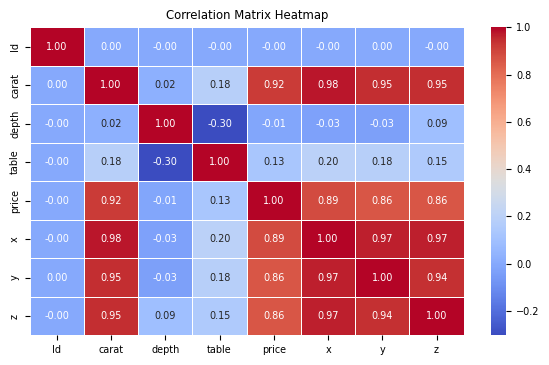

In [20]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- At Carat bigger than around 4 is Fair cut, and at carat 5 it has it's max price
- Most of data is concenrated around between 0.2 and 2.5 carat
- the Ideal cut got it's highest price at around between 1 and 2.5 carat

## Let's Look at the Categorical Data

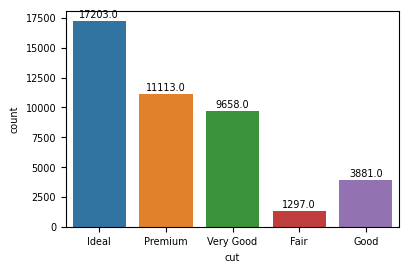

In [15]:
ax = sns.countplot(x='cut', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points');

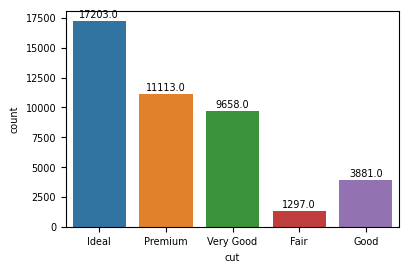

In [16]:
ax = sns.countplot(x='cut', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points');

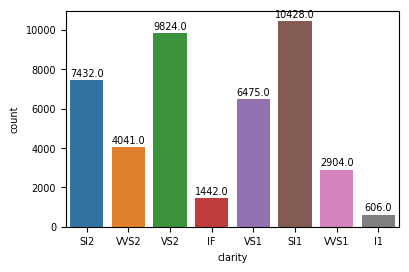

In [17]:
ax = sns.countplot(x='clarity', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points');

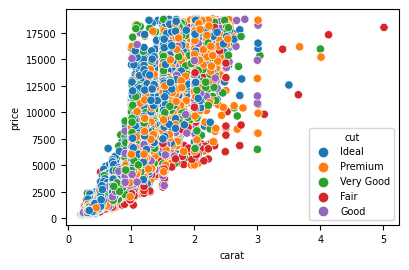

In [22]:
sns.scatterplot(x='carat', y='price', data=df, hue='cut');

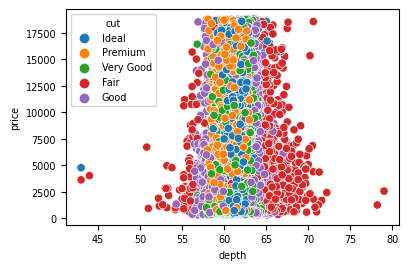

In [23]:
sns.scatterplot(x='depth', y='price', data=df, hue='cut');

- High correlations exist between diamond price and attributes like carat and dimensions (x, y, z). These factors are closely related and likely influential in determining diamond prices.
- Depth and Table have a weak negative correlation with each other.

# 3. Cleaning Data

## Droping non-added value feature

In [24]:
df_no_id = df.drop("Id", axis=1)

## Check for Duplicates

In [25]:
duplicates = df_no_id.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

97

There is a 97 Duplicate Rows, So we will remove them

In [29]:
df = df_no_id.drop_duplicates(keep='first')
df.duplicated().sum()

0

## Checking for Zero or Negative Values

In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
(df.select_dtypes(include=numerics)<=0).any(axis=1).sum()

17

In [31]:
df.loc[(df.select_dtypes(include=numerics)<=0).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
903,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
11221,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
13727,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21061,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0


Zero values are not logical at dimensions columns, so we will drop those rows.

In [32]:
df = df[(df[['x','y','z']]!= 0).all(axis=1)]
print((df.select_dtypes(include=numerics)<=0).any(axis=1).sum())
df.shape

0


(43038, 10)

**Handling Outliers**

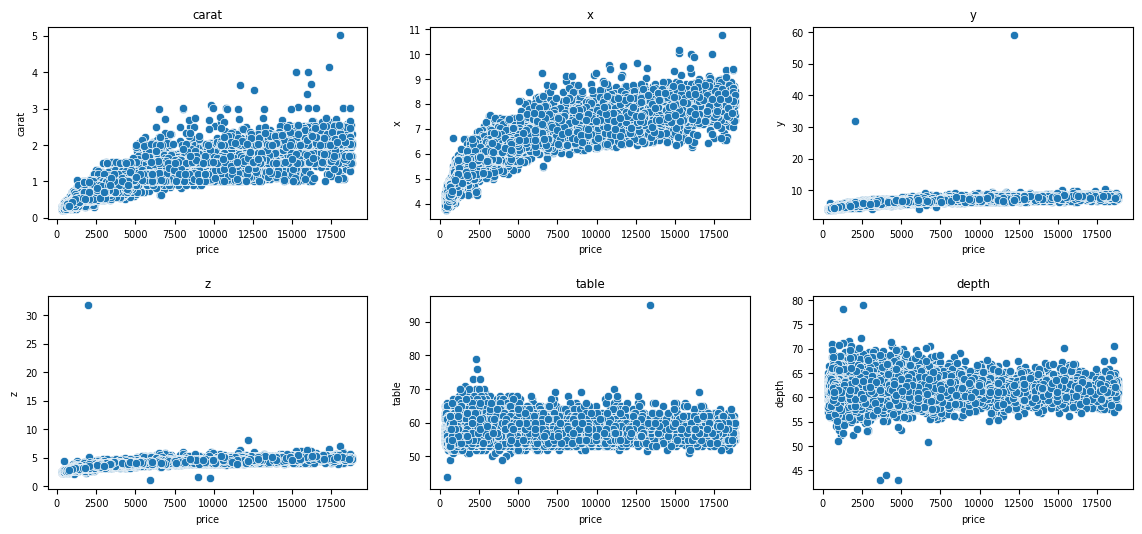

In [33]:
fig, axs = plt.subplots(2,3,figsize=(14,6))
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(data=df, x="price", y="carat", ax=axs[0][0]).set_title("carat");
sns.scatterplot(data=df, x="price", y="x", ax=axs[0][1]).set_title("x");
sns.scatterplot(data=df, x="price", y="y", ax=axs[0][2]).set_title("y");
sns.scatterplot(data=df, x="price", y="z", ax=axs[1][0]).set_title("z");
sns.scatterplot(data=df, x="price", y="table", ax=axs[1][1]).set_title("table");
sns.scatterplot(data=df, x="price", y="depth", ax=axs[1][2]).set_title("depth");

- carat and x look's good to go.
- for 'y' and 'z' I'll remove above 10.
- for 'table' I'll remove above 80.
- for 'depth' I'll remove below 50 or above 75.

In [34]:
outliers = df[
    (df.y > 10) | (df.z > 10) |\
    (df.table > 80) |\
    (df.depth < 50) | (df.depth > 75)]
df.drop(outliers.index, inplace=True)
print(f"Removed {outliers.shape[0]} Outliers")

Removed 11 Outliers


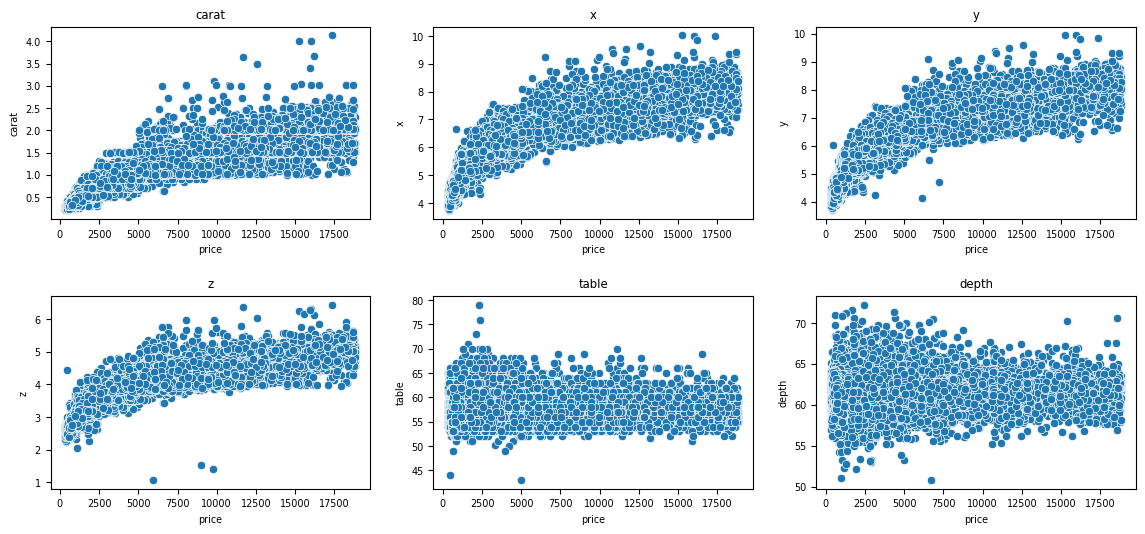

In [35]:
fig, axs = plt.subplots(2,3,figsize=(14,6))
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(data=df, x="price", y="carat", ax=axs[0][0]).set_title("carat");
sns.scatterplot(data=df, x="price", y="x", ax=axs[0][1]).set_title("x");
sns.scatterplot(data=df, x="price", y="y", ax=axs[0][2]).set_title("y");
sns.scatterplot(data=df, x="price", y="z", ax=axs[1][0]).set_title("z");
sns.scatterplot(data=df, x="price", y="table", ax=axs[1][1]).set_title("table");
sns.scatterplot(data=df, x="price", y="depth", ax=axs[1][2]).set_title("depth");

Look's Good Except for 'z' may be removing below 2 also.

In [36]:
z_outliers = df[(df.z < 2)]
df.drop(z_outliers.index, inplace=True)
print(f"Removed {z_outliers.shape[0]} Outliers")

Removed 3 Outliers


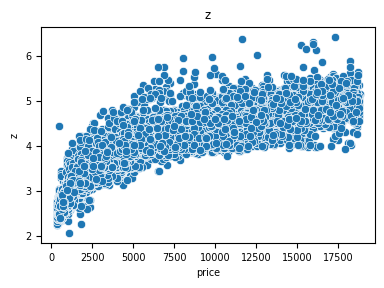

In [37]:
sns.scatterplot(data=df, x="price", y="z").set_title("z");

Look's better now

# 4. Preparing Data

## Feature Engineering

In [40]:
# Function to get the volume of Diamond more accurately
def volume_of_diamond(row):
    # Extracting length, width, and depth from the row
    length = row['x']
    width = row['y']
    depth = row['z']
    max_width=row['table']
    
    # Calculate the areas of the faces
    area_larger_face = length * max_width
    area_smaller_face = width ** 2
    
    
    # Calculate the volume
    volume = (1/3) * depth * (area_larger_face + area_smaller_face + math.sqrt(area_larger_face * area_smaller_face))
    
    return volume

In [72]:
#since (x y and z) can be replaced by the volume
processed_df = df.copy()
processed_df['volume'] = processed_df.apply(lambda x:(x["x"]*x["y"]*x["z"]), axis=1)
processed_df.drop(['x','y','z'], axis=1, inplace=True)
processed_df[:10]

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200
5,0.90,Very Good,G,IF,63.1,58.0,5670,145.652094
6,0.71,Very Good,F,VS1,61.8,60.0,3017,113.239620
7,0.70,Ideal,F,SI1,61.3,57.0,2288,116.175488
8,0.59,Ideal,D,VS1,60.9,56.0,2175,96.761280
9,0.31,Very Good,G,VVS1,59.8,62.0,761,50.260770


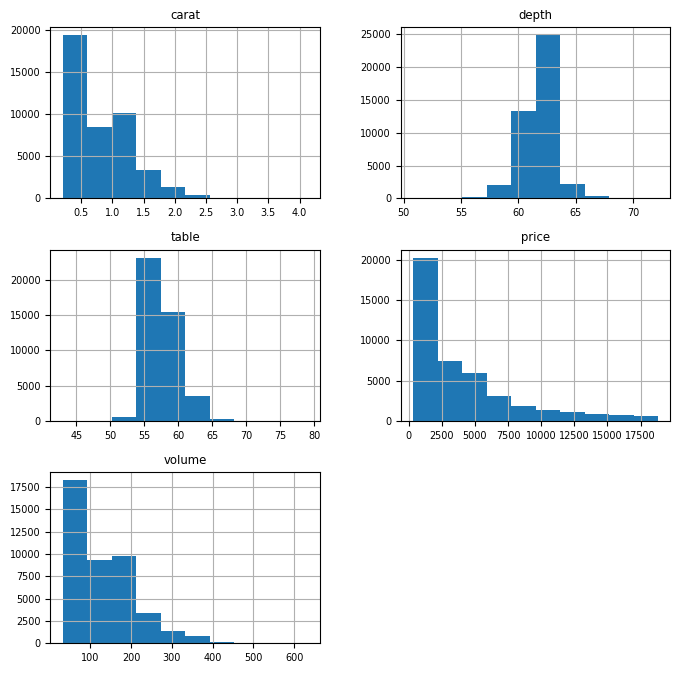

In [42]:
processed_df.hist(figsize=(8, 8));

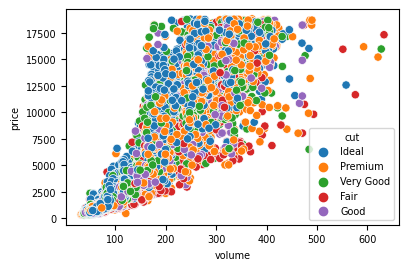

In [43]:
sns.scatterplot(x='volume', y='price', data=processed_df, hue='cut');

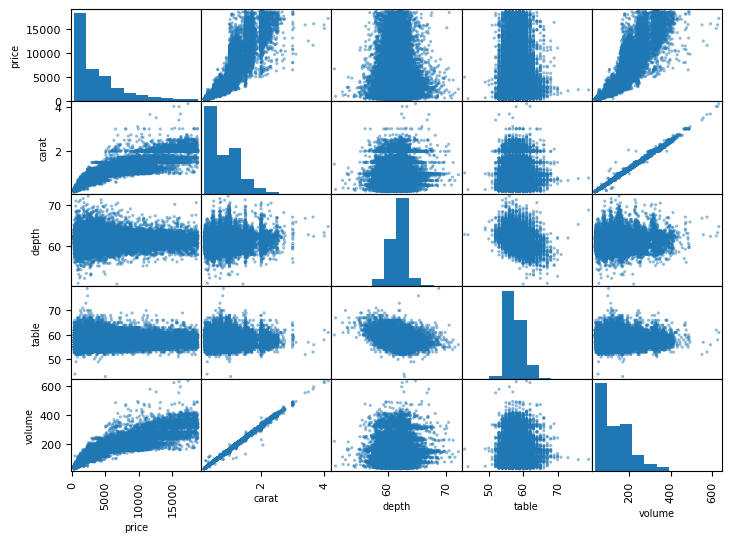

In [44]:
attributes = ["price", "carat", "depth", "table", "volume"]
scatter_matrix(processed_df[attributes], figsize=(8.4,6), s=20);

## Ordinal Encoding


We need to give the categorical data numerical values

In [73]:
enc_processed_df = processed_df.copy()

# Ordering each category
colors_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
cuts_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarities_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Transform ordinal columns
ord_enc = OrdinalEncoder(categories=[colors_cats, cuts_cats, clarities_cats])
diamond_cats_encoded = ord_enc.fit_transform(enc_processed_df[['color', 'cut', 'clarity']])

enc_processed_df[['color','cut','clarity']] = diamond_cats_encoded
enc_processed_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,4.0,1.0,1.0,61.8,57.0,4270,176.483340
1,1.51,3.0,3.0,5.0,60.9,58.0,15164,246.965796
2,0.32,4.0,4.0,3.0,61.3,56.0,828,52.943373
3,0.53,4.0,3.0,3.0,61.2,56.0,1577,86.422842
4,0.70,3.0,2.0,5.0,61.0,57.0,2596,115.315200


In [74]:
enc_processed_df.corr().price.sort_values(ascending=False)

price      1.000000
volume     0.924212
carat      0.922247
table      0.127605
depth     -0.013130
cut       -0.055436
clarity   -0.146704
color     -0.170819
Name: price, dtype: float64

In [75]:
enc_processed_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,4.0,1.0,1.0,61.8,57.0,4270,176.483340
1,1.51,3.0,3.0,5.0,60.9,58.0,15164,246.965796
2,0.32,4.0,4.0,3.0,61.3,56.0,828,52.943373
3,0.53,4.0,3.0,3.0,61.2,56.0,1577,86.422842
4,0.70,3.0,2.0,5.0,61.0,57.0,2596,115.315200


In [76]:
enc_processed_df.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,43024.000000,43024.000000,43024.000000,43024.000000,43024.000000,43024.000000,43024.000000,43024.000000
mean,0.797207,2.905099,3.406634,3.046369,61.747197,57.458509,3927.054737,129.739793
std,0.472207,1.114481,1.701998,1.649016,1.421744,2.225115,3981.731726,76.225777
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,31.707984
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,947.000000,65.189759
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,114.852720
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5311.000000,170.822400
max,4.130000,4.000000,6.000000,7.000000,72.200000,79.000000,18823.000000,633.355000


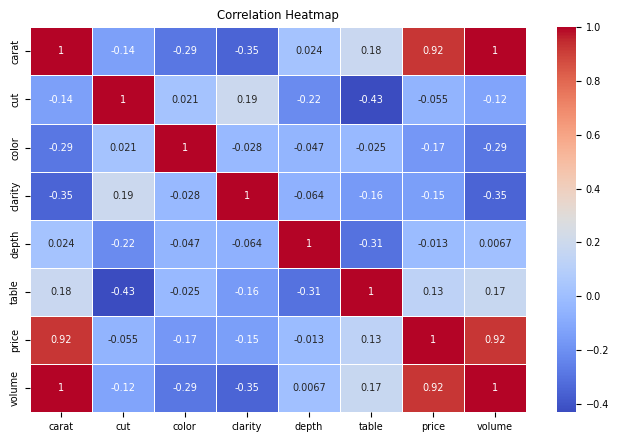

In [77]:
plt.figure(figsize=(8,5))
sns.heatmap(enc_processed_df.corr(), annot=True, linewidths=0.5, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

Surprisingly the clarity, color, and cut have a negative or no correlation with price, but this is because the Diamond carat (weight) and volume have more influence on the price.

# 5. Preparing model

In [78]:
# getting columns index for numeric features after dropping categorical features
x_ix2, y_ix2, z_ix2 = [
    list(df.drop(["cut", "color", "clarity", "price"], axis=1).columns).index(col)
    for col in ("x", "y", "z")]
class VolumeAttributesAdder(BaseEstimator, TransformerMixin):
    """Combine Attributes"""
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Calculate the volume
        volume = X[:, x_ix2] * X[:, y_ix2] * X[:, z_ix2]
        
        # Drop x', 'y', and 'z' columns
        X = np.delete(X, [x_ix2, y_ix2, z_ix2], axis=1)
        
        return np.c_[X, volume]

## Spliting Data to Train and Test Sets

Using carat features distribution we will make a stratified split to get fairly similar train and test sets.

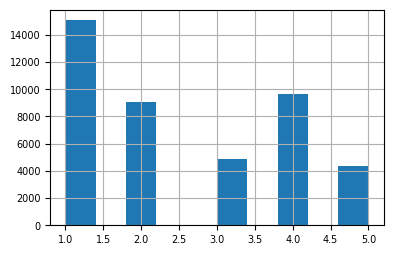

In [81]:
df.loc[:, "carat_cat"] = pd.cut(df["carat"],
                               bins=[0.19, 0.5, 0.75, 1, 1.5, np.inf],
                               labels=[1, 2, 3, 4, 5])
df["carat_cat"].hist();

In [82]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["carat_cat"]):
    train_set = df.iloc[train_index]
    test_set = df.iloc[test_index]

In [83]:
# Checking Sets Smilarity after Splitting

original_ratios = df["carat_cat"].value_counts() / len(df)
train_ratios = train_set["carat_cat"].value_counts() / len(train_set)
test_ratios = test_set["carat_cat"].value_counts() / len(test_set)
print(list(zip(original_ratios,train_ratios,test_ratios)))

[(0.35075771662328004, 0.3507655655306662, 0.35072632190586867), (0.22401450353291186, 0.22400418373572736, 0.2240557815223707), (0.21139364075864633, 0.2113948691129899, 0.2113887274840209), (0.11307642246188174, 0.11307707952003254, 0.11307379430563626), (0.10075771662328004, 0.10075830210058398, 0.10075537478210343)]


In [84]:
df= df.drop('carat_cat',axis=1)
train_set = train_set.drop('carat_cat',axis=1)
test_set = test_set.drop('carat_cat',axis=1);

Looks Good 👍

## Creating Pipelines

In [85]:
# dropping the target feature from sets

x_train= train_set.drop('price',axis=1)
y_train= train_set['price']
x_test= test_set.drop('price',axis=1)
y_test= test_set['price']

In [86]:
num_attribs = ["carat", "depth", "table", "x", "y", "z"]
cat_attribs = ['color', 'cut', 'clarity']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', VolumeAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline=Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencode',OrdinalEncoder(categories=[colors_cats, cuts_cats, clarities_cats])),
        ('scaler',StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("norm_num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.fit_transform(x_test)

In [102]:
x_train_prepared.shape

(34419, 7)

## Models Creation

### Linear Regression Model

In [88]:
linear_model=LinearRegression()
linear_model.fit(x_train_prepared,y_train)

LinearRegression()

### Evaluating Linear Regression Model

In [154]:
linear_model_score = linear_model.score(x_test_prepared, y_test)
linear_model_score

0.9121912840790678

In [90]:
lin_predic = linear_model.predict(x_test_prepared)
lin_rmse = mean_squared_error(
    y_test,
    lin_predic,
    squared=False  #RMSE
)
lin_rmse

1187.7526647447082

In [91]:
lin_scores = cross_val_score(
  linear_model,
  x_test_prepared,
  y_test,
  scoring ="neg_mean_squared_error",
  cv = 10
)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [1174.83347894 1223.31110693 1249.26628419 1084.4072613  1156.50396718
 1190.38882453 1197.95744941 1218.23196731 1181.05380673 1187.45414077]
Mean:  1186.340828730001
Standard Deviation:  42.35220527895303


### Decision Tree Regressorion Model

In [92]:
tree_model=DecisionTreeRegressor(random_state = 42)
tree_model.fit(x_train_prepared,y_train)

DecisionTreeRegressor(random_state=42)

### Evaluating Decision Tree Regressorion Model

In [155]:
tree_model_score = tree_model.score(x_test_prepared, y_test)
tree_model_score

0.9679069119401801

In [94]:
tree_predic = tree_model.predict(x_test_prepared)
tree_rmse = mean_squared_error(
    y_test,
    tree_predic,
    squared=False
)
tree_rmse

718.0636696439942

In [95]:
tree_scores = cross_val_score(
  tree_model,
  x_test_prepared,
  y_test,
  scoring ="neg_mean_squared_error",
  cv = 10
)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [801.20055985 738.07947391 743.45806708 777.63607788 866.47596781
 730.69331822 806.99245209 901.34929476 860.48244665 757.15929939]
Mean:  798.3526957643631
Standard Deviation:  57.04567321384389


### K Nearest Neighbor Regression Model

In [110]:
knns = []
for k in range(1, 20):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_prepared, y_train)
    knns.append((k, knn_regressor.score(x_test_prepared, y_test)))
best_knn_values = max(knns, key = lambda i : i[1])
print(f'Score for best k={best_knn_values[0]}: is {best_knn_values[1]}')


Score for best k=10: is 0.9674622198337178


In [111]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(x_train_prepared, y_train)

KNeighborsRegressor(n_neighbors=10)

### Evaluating K Nearest Neighbor Regression Model

In [156]:
knn_model_score = knn_model.score(x_test_prepared, y_test)
knn_model_score

0.9674622198337178

In [113]:
knn_predic = knn_model.predict(x_test_prepared)
knn_rmse = mean_squared_error(
    y_test,
    knn_predic,
    squared=False
)
knn_rmse

723.0214147901888

In [114]:
knn_scores = cross_val_score(
  knn_model,
  x_test_prepared,
  y_test,
  scoring ="neg_mean_squared_error",
  cv = 10
)
knn_rmse_scores = np.sqrt(-knn_scores)
print("Scores: ", knn_rmse_scores)
print("Mean: ", knn_rmse_scores.mean())
print("Standard Deviation: ", knn_rmse_scores.std())

Scores:  [798.19424497 839.90636493 885.33098311 712.5232469  827.62281422
 735.84170983 860.69248202 817.72519963 949.42519402 837.546358  ]
Mean:  826.480859763202
Standard Deviation:  64.90890704051506


### XGBoost Model

In [138]:
xgb_model = xgb.XGBRegressor(n_estimators=100, objective='reg:squarederror', tree_method='hist', eta=0.1, max_depth=3, random_state=42)
xgb_model.fit(x_train_prepared, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluating XGBoost Model

In [157]:
xgb_model_score = xgb_model.score(x_test_prepared, y_test)
xgb_model_score

0.8702517721291727

In [140]:
xgb_predic = xgb_model.predict(x_test_prepared)
xgb_rmse = mean_squared_error(
    y_test,
    xgb_predic,
    squared=False
)
xgb_rmse

1443.8029264452205

In [141]:
xgb_scores = cross_val_score(
  xgb_model,
  x_test_prepared,
  y_test,
  scoring ="neg_mean_squared_error",
  cv = 10
)
xgb_rmse_scores = np.sqrt(-xgb_scores)
print("Scores: ", xgb_rmse_scores)
print("Mean: ", xgb_rmse_scores.mean())
print("Standard Deviation: ", xgb_rmse_scores.std())

Scores:  [615.77477368 623.35241735 633.37886736 588.17990089 603.28828395
 562.28857428 637.4057718  688.28302082 670.27485766 597.12049001]
Mean:  621.9346957807678
Standard Deviation:  35.790541749356045


### Random Forest Model

In [150]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(x_train_prepared, y_train)

RandomForestRegressor(random_state=42)

### Evaluating Random Forest Model

In [158]:
forest_model_score = forest_model.score(x_test_prepared, y_test)
forest_model_score

0.9816880900862357

In [152]:
forest_predic = forest_model.predict(x_test_prepared)
forest_rmse = mean_squared_error(
    y_test,
    forest_predic,
    squared=False
)
forest_rmse

542.4054216291132

In [153]:
forest_scores = cross_val_score(
  forest_model,
  x_test_prepared,
  y_test,
  scoring ="neg_mean_squared_error",
  cv = 10
)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [611.73659639 554.55174792 588.78002293 602.7504877  593.06243663
 492.50670738 601.43544067 691.99361443 621.67443942 560.22958046]
Mean:  591.8721073926545
Standard Deviation:  48.78053804811605


## Comparing Models

In [162]:
data = [
    ['Linear Regression', linear_model_score, lin_rmse, lin_rmse_scores.mean()],
    ['Decision Tree', tree_model_score, tree_rmse, tree_rmse_scores.mean()],
    ['K Nearest Neighbor', knn_model_score, knn_rmse, knn_rmse_scores.mean()],
    ['XGBoost', xgb_model_score, xgb_rmse, xgb_rmse_scores.mean()],
    ['Random Forest', forest_model_score, forest_rmse, forest_rmse_scores.mean()],
]
df = pd.DataFrame(data, columns=['Model', 'Score', "RMSE", "CV_Mean"])
df

,Model,Score,RMSE,CV_Mean
0,Linear Regression,0.912191,1187.752665,1186.340829
1,Decision Tree,0.967907,718.063670,798.352696
2,K Nearest Neighbor,0.967462,723.021415,826.480860
3,XGBoost,0.870252,1443.802926,621.934696
4,Random Forest,0.981688,542.405422,591.872107


From the Comparison, we can see that the **Random Forest  Model** is the best candidate.

# 6- Fine-Tuning the Model

## Finding better parameters values using Grid Search CV

In [173]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [3, 5, 7]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the model
grid_search.fit(x_train_prepared, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

## Evalute Final Model

In [177]:
grid_cvres = grid_search.cv_results_

# Inspect mean_test_score before taking the square root
for mean_score, params in zip(grid_cvres["mean_test_score"], grid_cvres["params"]):
    if mean_score < 0:
        rmse = np.sqrt(-mean_score)
    else:
        rmse = np.sqrt(mean_score)
    
    # Print the RMSE and parameters, handling invalid sqrt values
    if np.isnan(rmse):
        print("Invalid RMSE encountered for parameters:", params)
    else:
        print(rmse, params)

0.9902484383256457 {'max_features': 3, 'n_estimators': 100}
0.9902644555189066 {'max_features': 3, 'n_estimators': 200}
0.9902586157222898 {'max_features': 3, 'n_estimators': 300}
0.9900592995110594 {'max_features': 5, 'n_estimators': 100}
0.9901505064301226 {'max_features': 5, 'n_estimators': 200}
0.9901705220269647 {'max_features': 5, 'n_estimators': 300}
0.989890323588074 {'max_features': 7, 'n_estimators': 100}
0.989941756271822 {'max_features': 7, 'n_estimators': 200}
0.9899542412322111 {'max_features': 7, 'n_estimators': 300}


In [178]:
final_grid_model = grid_search.best_estimator_
final_grid_model

RandomForestRegressor(max_features=3, n_estimators=200, random_state=42)

In [179]:
# final_predictions = final_model.predict(x_test_prepared)
final_grid_predictions = final_grid_model.predict(x_test_prepared)


# final_mse = mean_squared_error(y_test, final_predictions)
final_grid_mse = mean_squared_error(y_test, final_grid_predictions)
final_grid_rmse = np.sqrt(final_grid_mse)
final_grid_rmse

531.0001671494201

In [180]:
confidence = 0.95
squared_errors = (final_grid_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([506.71441965, 554.22274578])

Finally, we have a Model which can make predictions with confidence levels (506.7 to 554.2).

## Thanks for Reading to the End 🥰